In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
# Reshape the data for CNN
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [5]:
# Model architecture
model = Sequential()

In [6]:
# Convolutional layers
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\kgomo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

In [9]:
# Train the model and store history for visualization
history = model.fit(
    x_trainr,
    y_train,
    epochs=5,
    validation_split=0.3,
    batch_size=32,
)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7528 - loss: 0.7381 - val_accuracy: 0.9578 - val_loss: 0.1343
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9639 - loss: 0.1173 - val_accuracy: 0.9628 - val_loss: 0.1263
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9767 - loss: 0.0776 - val_accuracy: 0.9764 - val_loss: 0.0795
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9817 - loss: 0.0581 - val_accuracy: 0.9758 - val_loss: 0.0776
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9837 - loss: 0.0505 - val_accuracy: 0.9785 - val_loss: 0.0715


In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples:", test_loss)
print("Test accuracy on 10,000 test samples:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9741 - loss: 0.0852
Test loss on 10,000 test samples: 0.07058143615722656
Test accuracy on 10,000 test samples: 0.9790999889373779


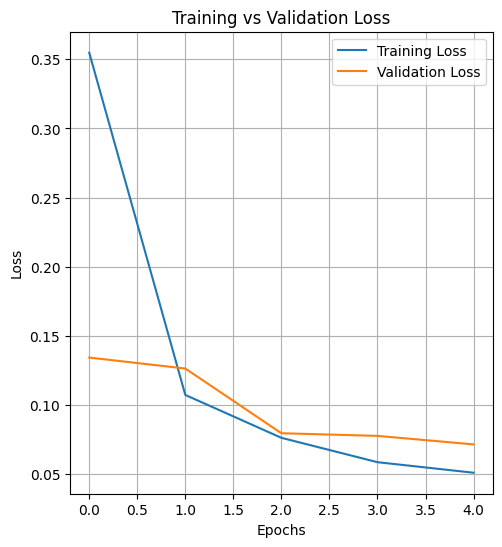

In [11]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.grid()
plt.legend()



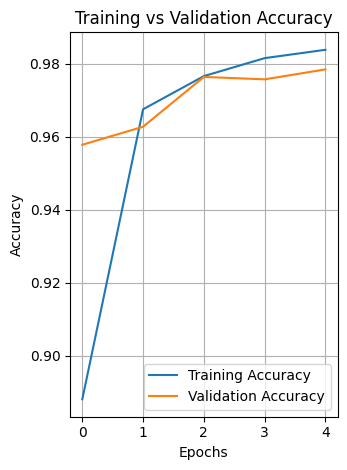

In [12]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt
import cv2
from data.digits import find_digits  # Ensure this is correctly implemented


def digit_recognition(image_name, model):
    """
    Recognize digits from an image using `find_digits` and a trained CNN model.
    
    Args:
    image_name (str): Path to the input image.
    model (tf.keras.Model): Trained CNN model.
    
    Returns:
    None
    """
    # Step 1: Load the image
    image = cv2.imread(image_name)
    if image is None:
        print("Error: Image not found.")
        return

    # Step 2: Detect digits and bounding boxes using `find_digits`
    digits, rects = find_digits(image)

    if len(digits) == 0:
        print("No digits detected.")
        return

    # Step 3: Preprocess each extracted digit for the model
    preprocessed_digits = []
    valid_rects = []
    for digit, rect in zip(digits, rects):
        x, y, w, h = rect
        # Skip very small or large bounding boxes (to filter noise)
        if w < 10 or h < 10 or w > 100 or h > 100:
            continue
        resized_digit = cv2.resize(digit, (28, 28))  # Resize to 28x28
        reshaped_digit = resized_digit.reshape(28, 28, 1)  # Add channel dimension
        normalized_digit = reshaped_digit / 255.0  # Normalize pixel values
        preprocessed_digits.append(normalized_digit)
        valid_rects.append(rect)  # Save only valid rectangles

    preprocessed_digits = np.array(preprocessed_digits)

    # Step 4: Predict labels using the trained model
    predictions = model.predict(preprocessed_digits)
    labels = np.argmax(predictions, axis=1)  # Get the predicted class labels

    # Step 5: Visualize results
    for tag, rect in zip(labels, valid_rects):
        x, y, w, h = rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(image, str(tag), (x, y - 5), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 3)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


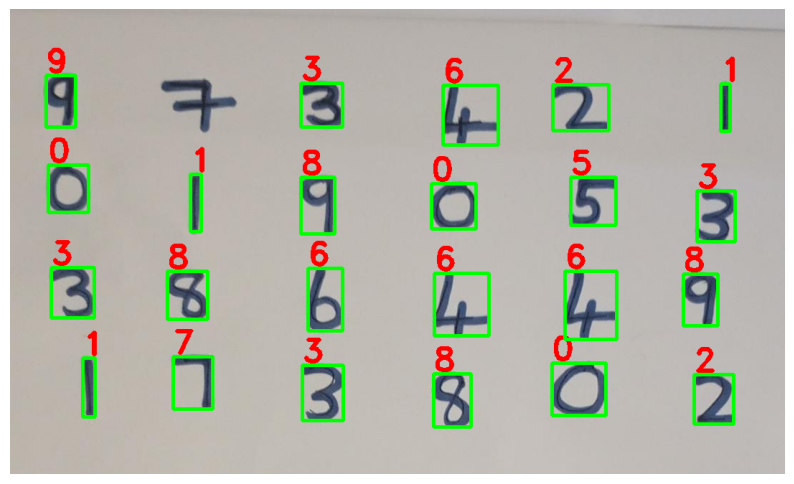

In [14]:
# Run digit recognition
image_name = "data/photo3.jpg"  # Replace with the path to your test image
digit_recognition(image_name, model)

## Reference
YouTube Video Link: https://youtu.be/u3FLVbNn9Os?si=5suzuuXuyccpCQqr